In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression






import os

crim: Per capita crime rate by town.
zn: Proportion of large residential lots (over 25,000 sq. ft.).
indus: Proportion of non-retail business acres per town.
Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).
nox: Concentration of nitrogen oxides in the air.
rm: Average number of rooms per dwelling.
age: Proportion of old owner-occupied units built before 1940.
dis: Weighted distances to Boston employment centers.
rad: Index of accessibility to radial highways.
tax: Property tax rate per $10,000.


In [2]:
file_path = os.getcwd()
file = os.path.join(file_path, 'BostonHousing.csv')

df = pd.read_csv(file, delimiter=',')








In [3]:
# df.head()
# df.describe()
# df.info()
df.isnull().sum().sort_values()

crim       0
zn         0
indus      0
chas       0
nox        0
age        0
dis        0
rad        0
lstat      0
tax        0
ptratio    0
b          0
medv       0
rm         5
dtype: int64

In [4]:
df['rm'] = df['rm'].fillna(df['rm'].mean())

<Axes: ylabel='Count'>

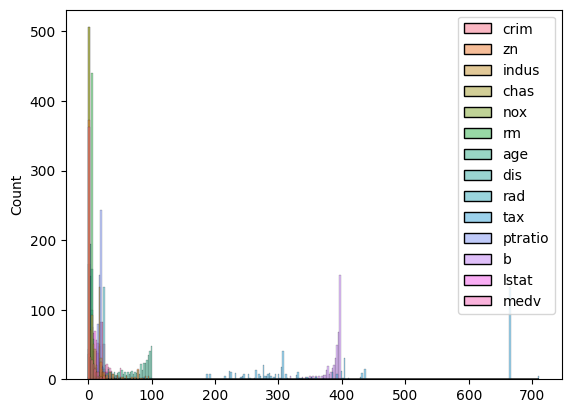

In [5]:
sns.histplot(df)

In [6]:
X = df.drop('medv',axis=1)#feature  doppelte eckige klammern geben einen 2D Dataframe zurück. einzelne Dataframe geben 1D pd Series zurück

y = df['medv'] #zielvariable  kontinuerlich

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
# scal = StandardScaler()

# X_train = scal.fit_transform(X_train)
# X_test = scal.transform(X_test)




In [ ]:


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86


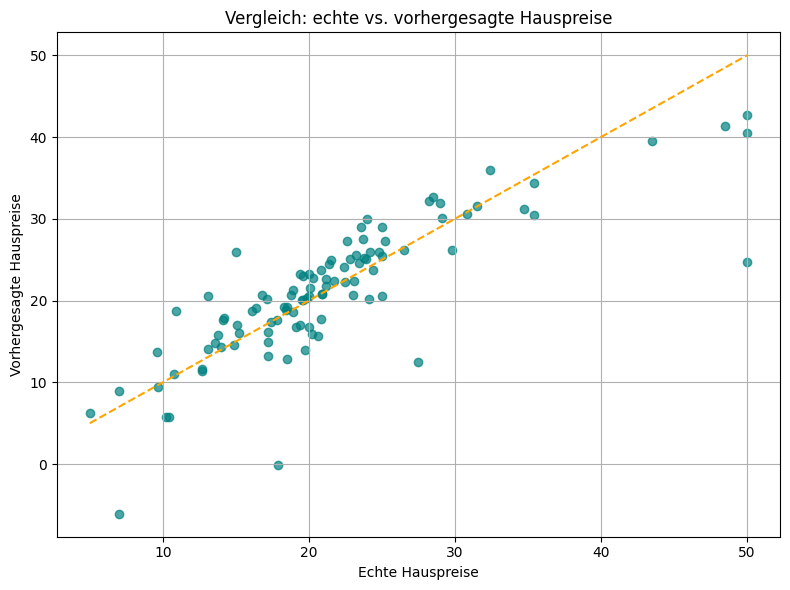

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='--')
plt.xlabel("Echte Hauspreise")
plt.ylabel("Vorhergesagte Hauspreise")
plt.title("Vergleich: echte vs. vorhergesagte Hauspreise")
plt.grid(True)
plt.tight_layout()
plt.show()

Ich zeichne Punkte, die die Beziehung zwischen:

echten Werten (y_test)

und vorhergesagten Werten (y_pred) darstellen.

scatter() zeigt jede einzelne Vorhersage als Punkt, das ist ideal für Modellvergleiche